This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.2319002 ]
 [ 0.6344553 ]
 [ 0.91299546]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.8255186 ]
 [0.7107688 ]
 [0.06524265]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.4142914 ],
       [-0.09847496],
       [-0.2552542 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)  #tensor 곱
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient 

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

In [12]:
# constant value -> mark it as it being tracked by calling tape.watch()
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient 

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [16]:
inputs[0]

array([-0.20742114,  2.9552126 ], dtype=float32)

**Generating the corresponding targets (0 and 1)**

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets.shape

(2000, 1)

**Plotting the two point classes**

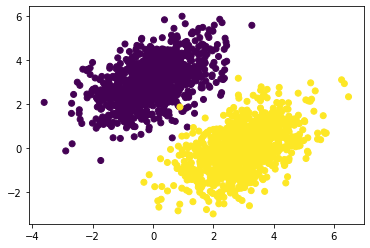

In [18]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [19]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [20]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [21]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [22]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [23]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.7539
Loss at step 1: 0.5595
Loss at step 2: 0.1884
Loss at step 3: 0.1410
Loss at step 4: 0.1274
Loss at step 5: 0.1181
Loss at step 6: 0.1100
Loss at step 7: 0.1025
Loss at step 8: 0.0957
Loss at step 9: 0.0895
Loss at step 10: 0.0839
Loss at step 11: 0.0787
Loss at step 12: 0.0740
Loss at step 13: 0.0697
Loss at step 14: 0.0658
Loss at step 15: 0.0622
Loss at step 16: 0.0589
Loss at step 17: 0.0560
Loss at step 18: 0.0532
Loss at step 19: 0.0507
Loss at step 20: 0.0485
Loss at step 21: 0.0464
Loss at step 22: 0.0445
Loss at step 23: 0.0428
Loss at step 24: 0.0412
Loss at step 25: 0.0398
Loss at step 26: 0.0384
Loss at step 27: 0.0372
Loss at step 28: 0.0362
Loss at step 29: 0.0352
Loss at step 30: 0.0342
Loss at step 31: 0.0334
Loss at step 32: 0.0327
Loss at step 33: 0.0320
Loss at step 34: 0.0313
Loss at step 35: 0.0307
Loss at step 36: 0.0302
Loss at step 37: 0.0297
Loss at step 38: 0.0293
Loss at step 39: 0.0289


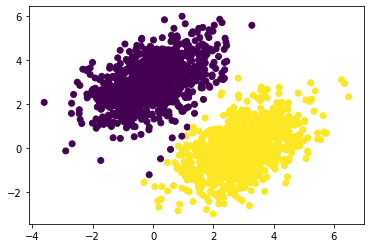

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

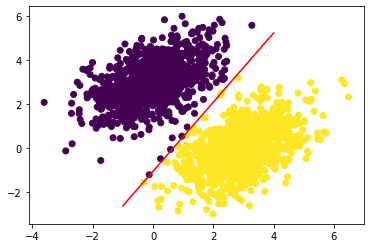

In [25]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [26]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [27]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [28]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [30]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [32]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [33]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 2s 7ms/step - loss: 3.7814 - binary_accuracy: 0.1900
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 3.5531 - binary_accuracy: 0.2045
Epoch 3/5
16/16 [==============================] - 0s 5ms/step - loss: 3.3631 - binary_accuracy: 0.2150
Epoch 4/5
16/16 [==============================] - 0s 7ms/step - loss: 3.1839 - binary_accuracy: 0.2250
Epoch 5/5
16/16 [==============================] - 0s 6ms/step - loss: 3.0119 - binary_accuracy: 0.2380


In [34]:
history.history

{'binary_accuracy': [0.1899999976158142,
  0.2045000046491623,
  0.2150000035762787,
  0.22499999403953552,
  0.23800000548362732],
 'loss': [3.7814087867736816,
  3.5530576705932617,
  3.363077402114868,
  3.1839282512664795,
  3.011857748031616]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 3s 19ms/step - loss: 0.0914 - binary_accuracy: 0.9543 - val_loss: 0.0275 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0745 - binary_accuracy: 0.9493 - val_loss: 0.0547 - val_binary_accuracy: 0.9917
Epoch 3/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0656 - binary_accuracy: 0.9686 - val_loss: 0.0401 - val_binary_accuracy: 0.9933
Epoch 4/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0678 - binary_accuracy: 0.9664 - val_loss: 0.0937 - val_binary_accuracy: 0.9517
Epoch 5/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0734 - binary_accuracy: 0.9614 - val_loss: 0.0451 - val_binary_accuracy: 0.9917


### Inference: Using a model after training

In [36]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.0269857 ]
 [ 0.8509836 ]
 [-0.0822446 ]
 [ 0.20266321]
 [ 0.6924225 ]
 [ 0.7870488 ]
 [ 0.92048717]
 [-0.1443347 ]
 [ 0.8075732 ]
 [ 0.1765765 ]]


## Summary